In [9]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Question:
    Is there a certain genre that has the highest sales?

## 1- Expectations:   
    - It seems that action is the most frequent genres, so it's expected to have the highest sales.

## 2- Data Collection: 
    

## Read data 

In [10]:
df = read_data(kind='dataset')

## Handle Missing Values
    - Dropping rows with missing values is not the best approach here, as shown in the Data Exploration section.
    - We will perform mode imputation for categorical features and KNN imputation for numerical features, since we are interested in exploring the sales' features 

In [11]:
df= handle_missing_values(df, handling_method='mode_knn', neighbors=5)

Total Number of rows : 16719
Number of rows with missing values: 9894
Number of rows after handling missing values: 16719 and Number of missing values: 0


## Handle outliers
    - Number of outliers in ['NA_Sales','EU_Sales','JP_Sales'] is very huge, so it's not the best action to remove all of them.
    - Instead we can remove the rows having more than 1 outlier in these 3 columns.

In [12]:
df= remove_common_outliers(df,['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'],)
print('Number of original rows: ', df.shape[0])

Number of outliers removed: 4760
Number of original rows:  11959


- This is safer than removing 10317 rows (As shown in Data Exploration section)

## Analysis

### Genre Distribution

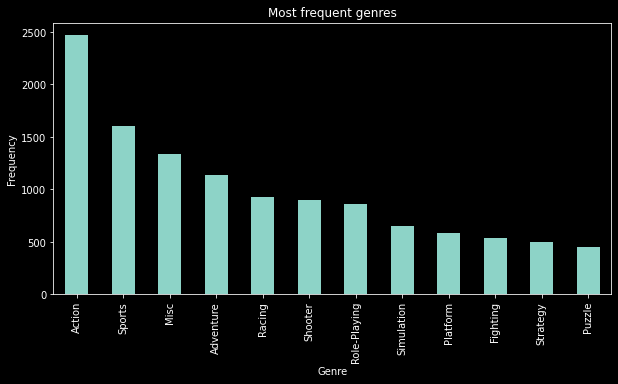

In [13]:
df['Genre'].value_counts().plot(kind='bar', figsize=(10,5))
plt.style.use('dark_background')
plt.title('Most frequent genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

### Average Sales for each genre

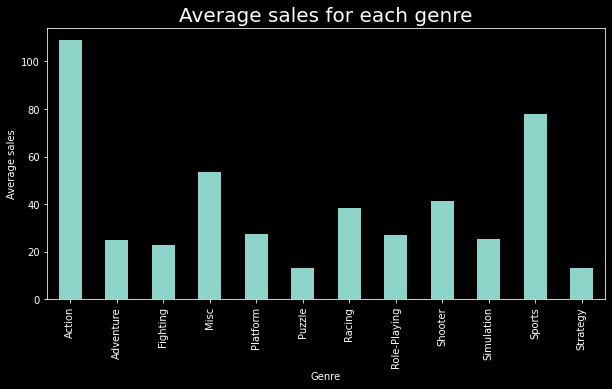

In [14]:
df_genre = df.groupby('Genre').sum(numeric_only=True)
df_genre['Total_Sales'] = df_genre[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean(axis=1)
df_genre['Total_Sales'].plot(kind='bar', figsize=(10,5))
plt.style.use('dark_background')
plt.title('Average sales for each genre', fontsize=20)
plt.xlabel('Genre')
plt.ylabel('Average sales')
plt.show()

### Global Sales for each genre

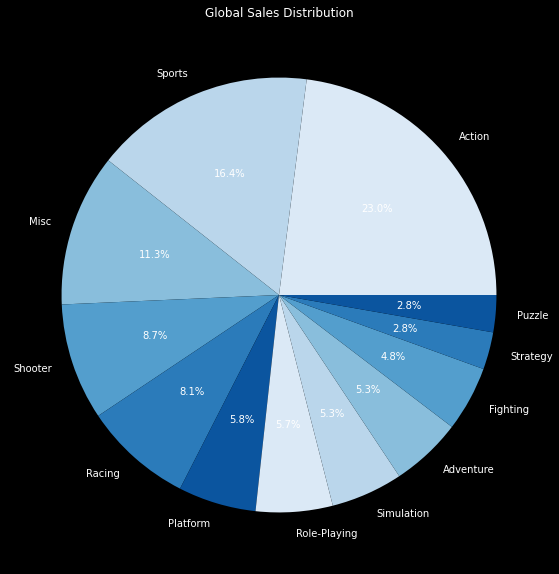

In [15]:
genres = df['Global_Sales'].groupby(df['Genre']).sum().sort_values(ascending=False).to_frame()
figure = plt.figure(figsize=(10,10))
plt.style.use('dark_background')
plt.pie(genres['Global_Sales'],labels = genres.index,autopct = '%1.1f%%',colors = sns.color_palette('Blues')) #plot first pie
plt.title('Global Sales Distribution')
plt.show()


## 3- Comparing Expectations to data:
    - Action genre has the highest sales as shown in the plots, so the expectations match the data.
        